<a href="https://colab.research.google.com/github/jcolivares/dashboard/blob/master/regAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Lineal y AutoRegresion

Ests notas muestran como aplicar dos conceptos básicos de estadística para el pronóstico de datos futuros usando series de tiempo

*Primer paso: Importar biblioteca.*

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as s

from sklearn import linear_model as lm

Se importa biblioteca desde repositorio de datos

In [0]:
data = pd.read_csv("http://dsc.itmorelia.edu.mx/~jcolivares/data/consumoCasa2.csv")

data.head()

,Fecha inicial,Fecha final,Consumo,Precio1,Precio2,Precio3,Total,Apoyo
0,06/01/15,05/03/15,200.0,0.793,0.956,2.802,228.0,NaN
1,05/03/15,06/05/15,247.0,0.793,0.956,2.802,281.0,NaN
2,06/05/15,06/07/15,219.0,0.793,0.956,2.802,249.0,NaN
3,06/07/15,04/09/15,224.0,0.793,0.956,2.802,255.0,NaN
4,04/09/15,05/11/15,229.0,0.793,0.956,2.802,260.0,NaN


imprimimos todos los datos

In [0]:
data

,Fecha inicial,Fecha final,Consumo,Precio1,Precio2,Precio3,Total,Apoyo
0,06/01/15,05/03/15,200.0,0.793,0.956,2.802,228.0,NaN
1,05/03/15,06/05/15,247.0,0.793,0.956,2.802,281.0,NaN
2,06/05/15,06/07/15,219.0,0.793,0.956,2.802,249.0,NaN
3,06/07/15,04/09/15,224.0,0.793,0.956,2.802,255.0,NaN
4,04/09/15,05/11/15,229.0,0.793,0.956,2.802,260.0,NaN
5,05/11/15,06/01/16,257.0,0.793,0.956,2.802,301.0,NaN
6,06/01/16,04/03/16,213.0,0.793,0.956,2.802,239.0,NaN
7,04/03/16,06/05/16,254.0,0.793,0.956,2.802,283.0,NaN
8,06/05/16,06/07/16,267.0,0.793,0.956,2.802,307.0,NaN
9,06/07/16,06/09/16,236.0,0.793,0.956,2.802,264.0,NaN


Imprimimos tamaños del conjunto de datos

In [0]:
data.shape


(28, 8)

In [0]:
data.count()

Fecha inicial    28
Fecha final      27
Consumo          27
Precio1          27
Precio2          27
Precio3          27
Total            27
Apoyo            16
dtype: int64

Contamos valores nulos por columnas

In [0]:
col_names = data.columns.tolist()

for column in col_names:
  print("Valores nullos en <{0}>: {1}".format(column, data[column].isnull().sum()))

Valores nullos en <Fecha inicial>: 0
Valores nullos en <Fecha final>: 1
Valores nullos en <Consumo>: 1
Valores nullos en <Precio1>: 1
Valores nullos en <Precio2>: 1
Valores nullos en <Precio3>: 1
Valores nullos en <Total>: 1
Valores nullos en <Apoyo>: 12


Imprimimos una columna

In [0]:
data["Precio1"]

0     0.793
1     0.793
2     0.793
3     0.793
4     0.793
5     0.793
6     0.793
7     0.793
8     0.793
9     0.793
10    0.793
11    0.793
12    0.793
13    0.793
14    0.793
15    0.793
16    0.793
17    0.793
18    0.793
19    0.793
20    0.793
21    0.793
22    0.793
23    0.793
24    0.799
25    0.805
26    0.811
27      NaN
Name: Precio1, dtype: float64

In [0]:
#O simplemente cpn su nombre
data.Consumo

0     200.0
1     247.0
2     219.0
3     224.0
4     229.0
5     257.0
6     213.0
7     254.0
8     267.0
9     236.0
10    271.0
11    321.0
12    305.0
13    278.0
14    307.0
15    279.0
16    262.0
17    282.0
18    274.0
19    298.0
20    321.0
21    285.0
22    268.0
23    251.0
24    250.0
25    293.0
26    296.0
27      NaN
Name: Consumo, dtype: float64

Estadísticos descriptivos

In [0]:
data.describe()

,Consumo,Precio1,Precio2,Precio3,Total,Apoyo
count,27.000000,27.000000,27.000000,27.00000,27.000000,16.000000
mean,266.185185,0.794333,0.957778,2.07963,325.407407,-720.183750
std,32.473702,0.004188,0.005584,1.25385,73.118060,299.125231
min,200.000000,0.793000,0.956000,0.00000,228.000000,-1143.510000
25%,248.500000,0.793000,0.956000,1.40100,280.500000,-1041.557500
50%,268.000000,0.793000,0.956000,2.80200,308.000000,-605.680000
75%,289.000000,0.793000,0.956000,2.80200,352.500000,-509.455000
max,321.000000,0.811000,0.980000,2.86800,503.000000,-275.730000


Correlacion

In [0]:
data.corr()

,Consumo,Precio1,Precio2,Precio3,Total,Apoyo
Consumo,1.000000,0.215315,0.215315,0.006404,0.922867,-0.202015
Precio1,0.215315,1.000000,1.000000,0.079907,0.191087,0.245103
Precio2,0.215315,1.000000,1.000000,0.079907,0.191087,0.245103
Precio3,0.006404,0.079907,0.079907,1.000000,0.181244,0.066217
Total,0.922867,0.191087,0.191087,0.181244,1.000000,-0.266240
Apoyo,-0.202015,0.245103,0.245103,0.066217,-0.266240,1.000000


Obtenemos un subconjunto de datos sin nulos

In [0]:
info = data.loc[:,["Fecha final", "Consumo"]]

info = info.dropna()

info

,Fecha final,Consumo
0,05/03/15,200.0
1,06/05/15,247.0
2,06/07/15,219.0
3,04/09/15,224.0
4,05/11/15,229.0
5,06/01/16,257.0
6,04/03/16,213.0
7,06/05/16,254.0
8,06/07/16,267.0
9,06/09/16,236.0


Colocamos indice de la serie y graficamos

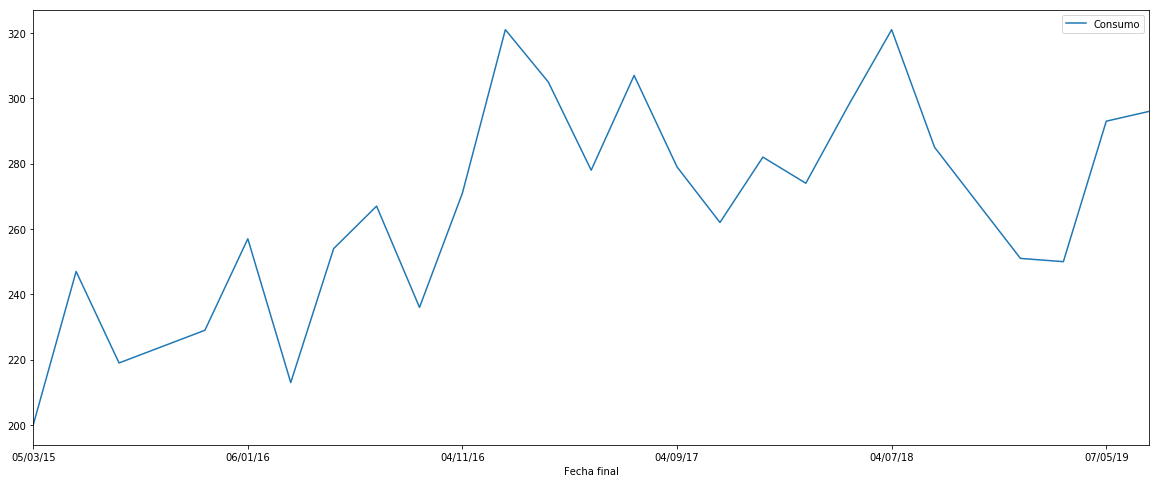

In [0]:
info = info.set_index('Fecha final')

info.plot(figsize=(20, 8))

Se realiza la regresión lineal

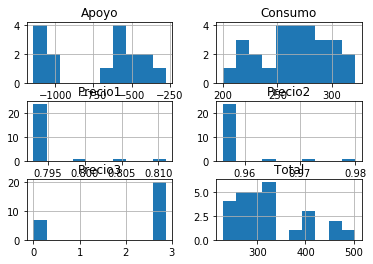

In [0]:
#visualizamos histogramas
h = data.hist()
plt.show()

Cargamos otro ejemplo de datos y predecimos

In [0]:
train = pd.read_csv("http://dsc.itmorelia.edu.mx/~jcolivares/data/consumoCasa1.csv")

train = train.loc[:, ["Fecha final", "Consumo"]]

train = train.set_index("Fecha final")

train

,Consumo
Fecha final,
15/07/16,0
15/09/16,1
15/11/16,0
13/01/17,0
15/03/17,0
16/05/17,0
14/07/17,0
13/09/17,0
13/11/17,0


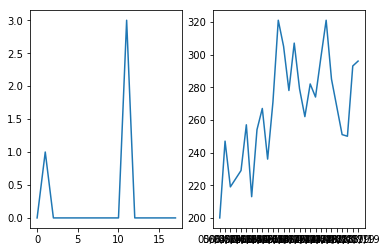

In [0]:
regr = lm.LinearRegression()

#regr.fit(train, train)
regr.fit(info, info)

#prediccion = regr.predict(info)
prediccion = regr.predict(train)

prediccion

plt.subplot(1,2,1)
plt.plot(prediccion) 

plt.subplot(1,2,2)
plt.plot(info) 
#plt.plot(train)

plt.show()


## Modelo de AR

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


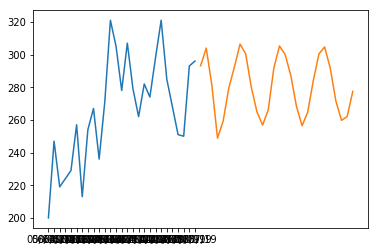

In [315]:
# Importar bibliotecas
from statsmodels.tsa.ar_model import AR
from random import random
#import pandas as pd


# Modelo de ajuste
model = AR(info["Consumo"])
model_fit = model.fit(10)

# Hacer prediccion
yhat = model_fit.predict(len(info["Consumo"]), len(info["Consumo"])+len(info["Consumo"]-1))

plt.plot(info) 
plt.plot(yhat)

#plt.plot(info, yhat)